<a href="https://colab.research.google.com/github/ba18406/Lab001/blob/master/answers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print (df)
print (data)
print(data.shape)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
(14,)


In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  new_array = np.random.choice(sample, (n_iterations, sample_size), replace = True)
  print(new_array.shape,new_array)
  data_mean = np.mean(new_array)
  mean_array = np.array(new_array.mean(axis=1))
  print (mean_array)
  lower = np.percentile(mean_array, 2.5)
  upper = np.percentile(mean_array, 97.5)
  print(lower,upper)
  return data_mean, lower, upper

(100, 14) [[ 9. 10.  8. ...  2.  4.  2.]
 [10.  5.  9. ...  4.  8.  7.]
 [13. 10.  2. ... 10.  9.  2.]
 ...
 [13. 20.  9. ... 10.  5.  4.]
 [22.  2. 20. ... 10.  4.  4.]
 [22.  8.  9. ...  4.  9.  8.]]
[ 8.71428571  7.71428571  9.28571429  9.64285714  8.07142857  9.92857143
  9.92857143 12.5         9.07142857  9.5         6.57142857 13.21428571
  7.85714286  7.07142857 11.35714286  7.35714286 10.          6.5
  7.78571429  8.21428571  9.57142857 10.78571429  7.92857143  8.57142857
 11.78571429 11.57142857  9.5        10.78571429  7.85714286  7.57142857
  9.28571429  9.57142857 10.71428571  7.78571429 10.21428571 10.5
  7.5        12.78571429  7.85714286 10.92857143  8.42857143 10.35714286
  7.64285714 10.57142857 10.5         9.         10.5        10.21428571
  9.21428571  8.78571429  7.28571429  9.57142857  9.14285714  9.78571429
  7.14285714  7.35714286  5.64285714  8.5         9.14285714  7.5
  8.28571429 10.21428571  8.92857143 10.5        11.57142857  8.42857143
  8.71428571  7.

(0, 100000)

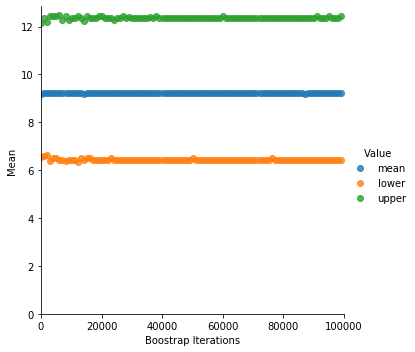

In [48]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
